In [1]:
# number of frac stages has a significant positive correlation with oil produced
# amount of proppant and pump rate have slight positive correlations with oil produced

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

os.chdir("C:\\Users\\ethan\\Downloads\\energy_analytics-master\\Project")

prod = pd.read_csv("well production.csv")

lists = {}

for file in os.listdir("C:\\Users\\ethan\\Downloads\\energy_analytics-master\\Project\\data"):
     filename = os.fsdecode(file)
     if filename.endswith(".csv"):
        df = pd.read_csv(filename)
        lists[filename[:len(filename)-4]]=df
    
    
prod.index = prod['well name']

oil = {}
for name in prod['well name']:
    oil[name] = np.sum(prod.loc[name][4:16])
    
    
stages = {}
for name in lists.keys():
    stages[name] = lists[name]['proppant weight (lbs)'].dropna().size
    
avgProppant = {}
for name in lists.keys():
    avgProppant[name] = np.average(lists[name]['proppant weight (lbs)'].dropna())
    
avgRate = {}
for name in lists.keys():
    avgRate[name] = np.average(lists[name]['pump rate (cubic feet/min)'].dropna())
    
oildf = pd.DataFrame(oil.items(), columns = ['well name','total oil'])
oildf = oildf.sort_values('well name')


score: 0.4309192154945283
m: 42.77054049033636


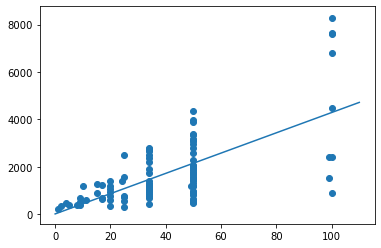

In [2]:
stagesReg = LinearRegression()
x = np.array(list(stages.values()))
y = oildf['total oil'].values

stagesReg.fit(x.reshape(-1,1),y.reshape(-1,1))

print('score: '+str(stagesReg.score(x.reshape(-1,1),y.reshape(-1,1))))
print('m: '+str(stagesReg.coef_[0][0]))

plt.plot(np.linspace(0,110,20),stagesReg.predict(np.linspace(0,110,20).reshape(-1,1)))

plt.scatter(x,y) # number of stages vs oil

score: 0.01861232470139551
m: 0.0024232501290117354


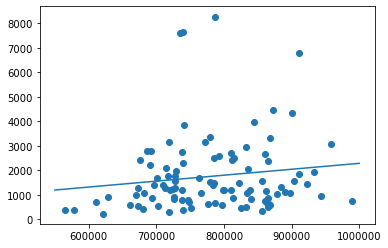

In [3]:
propReg = LinearRegression()
x2 = np.array(list(avgProppant.values()))
y2 = oildf['total oil'].values

propReg.fit(x2.reshape(-1,1),y2.reshape(-1,1))

print('score: '+str(propReg.score(x2.reshape(-1,1),y2.reshape(-1,1))))
print('m: '+str(propReg.coef_[0][0]))

plt.plot(np.linspace(550000,1000000,100),propReg.predict(np.linspace(550000,1000000,100).reshape(-1,1)))

plt.scatter(x2,y2) # avg proppant vs oil

score: 0.0026961277094244007
m: 8.44443256330598


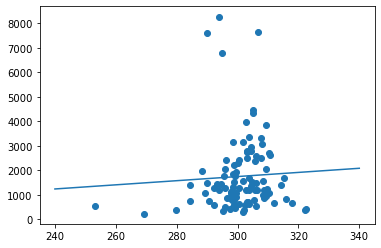

In [4]:
rateReg = LinearRegression()
x3 = np.array(list(avgRate.values()))
y3 = oildf['total oil'].values

rateReg.fit(x3.reshape(-1,1),y3.reshape(-1,1))

print('score: '+str(rateReg.score(x3.reshape(-1,1),y3.reshape(-1,1))))
print('m: '+str(rateReg.coef_[0][0]))

plt.plot(np.linspace(240,340,20),rateReg.predict(np.linspace(240,340,20).reshape(-1,1)))

plt.scatter(x3,y3) # avg pump rate vs oil